<a href="https://colab.research.google.com/github/rajadevineni/House_Price_Prediction/blob/master/KNN_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install feature_engine


     |████████████████████████████████| 9.5MB 5.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# **Loading the Data**

In [8]:
data =  pd.read_csv("data.csv")
make_prediction= pd.read_csv("make_prediction.csv")

In [9]:
print(data.shape)
print(make_prediction.shape)

(3000, 18)
(1552, 17)


In [10]:
pd.set_option('display.max_columns', 999)
data.head()

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,1,591000.0,3,1.75,1680,2400,1.0,0,0,5,870,810,1922,1956,1600-1608 25th Ave,Seattle,WA 98122,USA
1,2,415000.0,4,2.25,3060,48787,2.0,0,0,3,3060,0,1992,0,31701-31799 SE 291st St,Ravensdale,WA 98051,USA
2,3,402000.0,3,2.50,1960,8000,1.0,0,0,4,1290,670,1977,0,12207 NE 139th Pl,Kirkland,WA 98034,USA
3,4,542525.0,4,2.50,2650,5600,2.0,0,0,3,2650,0,2014,0,13516 164th Ave SE,Renton,WA 98059,USA
4,5,515000.0,3,2.50,2010,7200,2.0,0,0,3,2010,0,1994,0,8818 NE 150th St,Kenmore,WA 98028,USA


In [11]:
make_prediction.head()

,Id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3000,2,1.00,1210,9400,1.0,0,0,2,1210,0,1949,0,7542 21st Ave SW,Seattle,WA 98106,USA
1,3001,3,1.75,1620,3975,1.0,0,0,5,940,680,1926,0,6729 Dibble Ave NW,Seattle,WA 98117,USA
2,3002,3,1.00,1520,213444,1.5,0,3,5,1520,0,1988,0,10500 185th Ave SE,Renton,WA 98059,USA
3,3003,4,2.50,2910,5776,2.0,0,2,3,2910,0,1998,2006,6907 Fairway Ave SE,Snoqualmie,WA 98065,USA
4,3004,4,2.50,2683,40386,2.0,0,0,4,2683,0,1987,0,10821 151st Ave NE,Redmond,WA 98052,USA


## **Basic Statistics of the data**

In [12]:
data.describe()

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,5.593498e+05,3.397000,2.158250,2134.094000,1.464680e+04,1.511333,0.008333,0.242000,3.447000,1821.023333,313.070667,1971.042667,792.034333
std,866.169729,6.346427e+05,0.910128,0.770071,946.966058,3.634340e+04,0.541420,0.090921,0.783352,0.674297,844.532322,466.736261,29.622874,976.379493
min,1.000000,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,750.750000,3.250000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,1500.500000,4.642500e+05,3.000000,2.250000,1975.000000,7.651000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2250.250000,6.575000e+05,4.000000,2.500000,2630.000000,1.090125e+04,2.000000,0.000000,0.000000,4.000000,2303.000000,620.000000,1997.000000,1999.000000
max,3000.000000,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


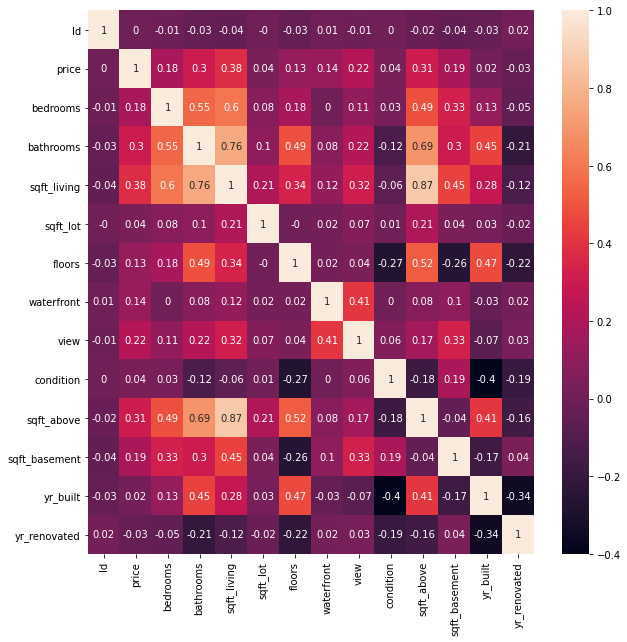

In [20]:
#code snippet reference from course work.
import seaborn as sns
correlation_matrix = data.corr().round(2)
figure = plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)

## **Correlation matrix**

In [21]:
data.corr(method='pearson', min_periods=1)

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
Id,1.000000,0.000575,-0.009741,-0.031625,-0.039132,-0.002971,-0.027469,0.007141,-0.009527,0.000106,-0.024031,-0.035911,-0.026429,0.019754
price,0.000575,1.000000,0.182017,0.302978,0.375156,0.039913,0.130024,0.137875,0.220784,0.037116,0.314669,0.191783,0.023941,-0.026931
bedrooms,-0.009741,0.182017,1.000000,0.546901,0.600499,0.079987,0.176616,0.000302,0.109337,0.030222,0.488764,0.333968,0.127379,-0.050081
bathrooms,-0.031625,0.302978,0.546901,1.000000,0.759814,0.102032,0.492346,0.081170,0.217710,-0.120381,0.685226,0.301719,0.448932,-0.207501
sqft_living,-0.039132,0.375156,0.600499,0.759814,1.000000,0.209988,0.337882,0.121225,0.315135,-0.061473,0.870365,0.454036,0.278092,-0.121630
sqft_lot,-0.002971,0.039913,0.079987,0.102032,0.209988,1.000000,-0.000275,0.016129,0.072247,0.012879,0.211597,0.043175,0.026662,-0.020523
floors,-0.027469,0.130024,0.176616,0.492346,0.337882,-0.000275,1.000000,0.021789,0.043062,-0.269163,0.521003,-0.257192,0.467004,-0.221614
waterfront,0.007141,0.137875,0.000302,0.081170,0.121225,0.016129,0.021789,1.000000,0.407072,0.004487,0.078615,0.103706,-0.033559,0.015622
view,-0.009527,0.220784,0.109337,0.217710,0.315135,0.072247,0.043062,0.407072,1.000000,0.057747,0.172158,0.327872,-0.070985,0.025204
condition,0.000106,0.037116,0.030222,-0.120381,-0.061473,0.012879,-0.269163,0.004487,0.057747,1.000000,-0.175838,0.193446,-0.396105,-0.187851


# **1.	Determine, which features, are continuous vs categorical**

In [22]:
categorical_features = ['view','condition','waterfront','city','statezip']
discreate_features = ['bedrooms','bathrooms','floors']
continous_features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']
print("Categorical Features: ")
for i in categorical_features:
  print("\t",i)
print("Discreate Features: ")
for i in discreate_features:
  print("\t",i)
print("Continous Features: ")
for i in continous_features:
  print("\t",i)

Categorical Features: 
	 view
	 condition
	 waterfront
	 city
	 statezip
Discreate Features: 
	 bedrooms
	 bathrooms
	 floors
Continous Features: 
	 sqft_living
	 sqft_lot
	 sqft_above
	 sqft_basement
	 yr_built
	 yr_renovated


# **2.	Visualize the univariate distribution of each continuous feature, and the distribution of the target**

## **Distribution of each continuous feature**
### **Key take aways from disctribution graphs:**
* More than half of the data doesn't have the year of rennovation values, that can be either due to no rennovations recorded for that house or no rennovations done
* There are outliers in variables like "sqft_lot" with abnormal data values

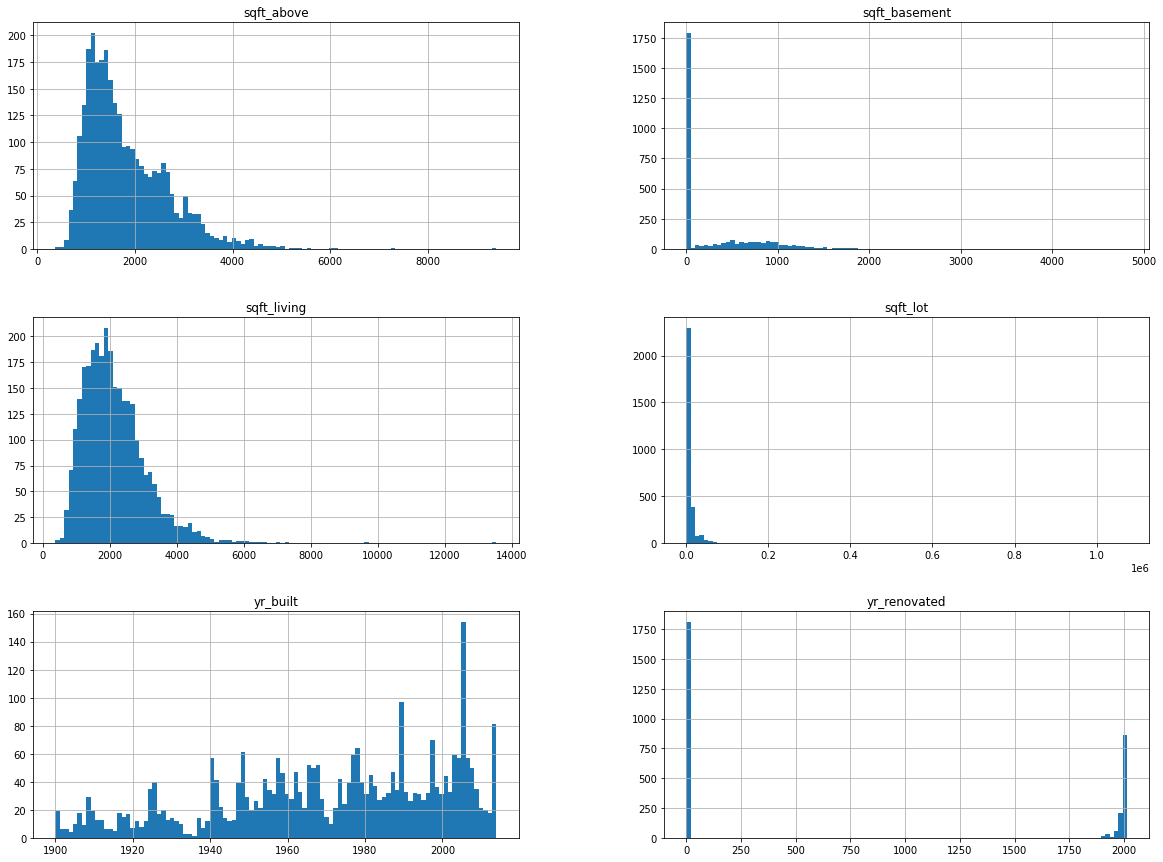

In [23]:
data[continous_features].hist(bins=100, figsize=(20,15))
plt.show()

## **Distribution of Prices**

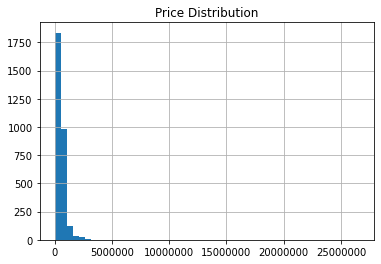

In [25]:
data['price'].hist(bins=50)
plt.title("Price Distribution")
plt.ticklabel_format(useOffset=False, style='plain') # removing the scientific scales on the axes
plt.show()

# **3. Do you notice anything? Is there something that might require special treatment?**

Yes, I noticed that there are some outlier that could potentially affect the regression, removing the outliers could help make better predictions

* Capping the price of the house variable to 1 million(1000000)
* Capping Bathrooms to 5
* Capping number of bedrooms to 4
* Capping sqft_living to 5000
* Capping sqft_above to 5000

In [26]:
data_capp = data[
     (data["price"] <= 1000000) & 
     (data["bathrooms"] <= 5) & 
     (data["bedrooms"] <= 4) & 
     (data["sqft_living"] <= 5000) & 
     (data["sqft_above"] <= 5000)
    ]

In [27]:
print(data_capp.shape)

(2567, 18)


# **4. Dependency of the price on each continuous feature.**



### **Visualizing dependancy of price on Continous Features**

* Looking at the scatter plots, we can see that there are few outliers in the data with abnormal data values which was also seen in the univariate distribution graphs

* **Looking at the *yr_rennovated* data from both histogram and scatter plot, >50% of the data has 0s. This may be due to various reasons discussed above, hence we can consider to drop this column**

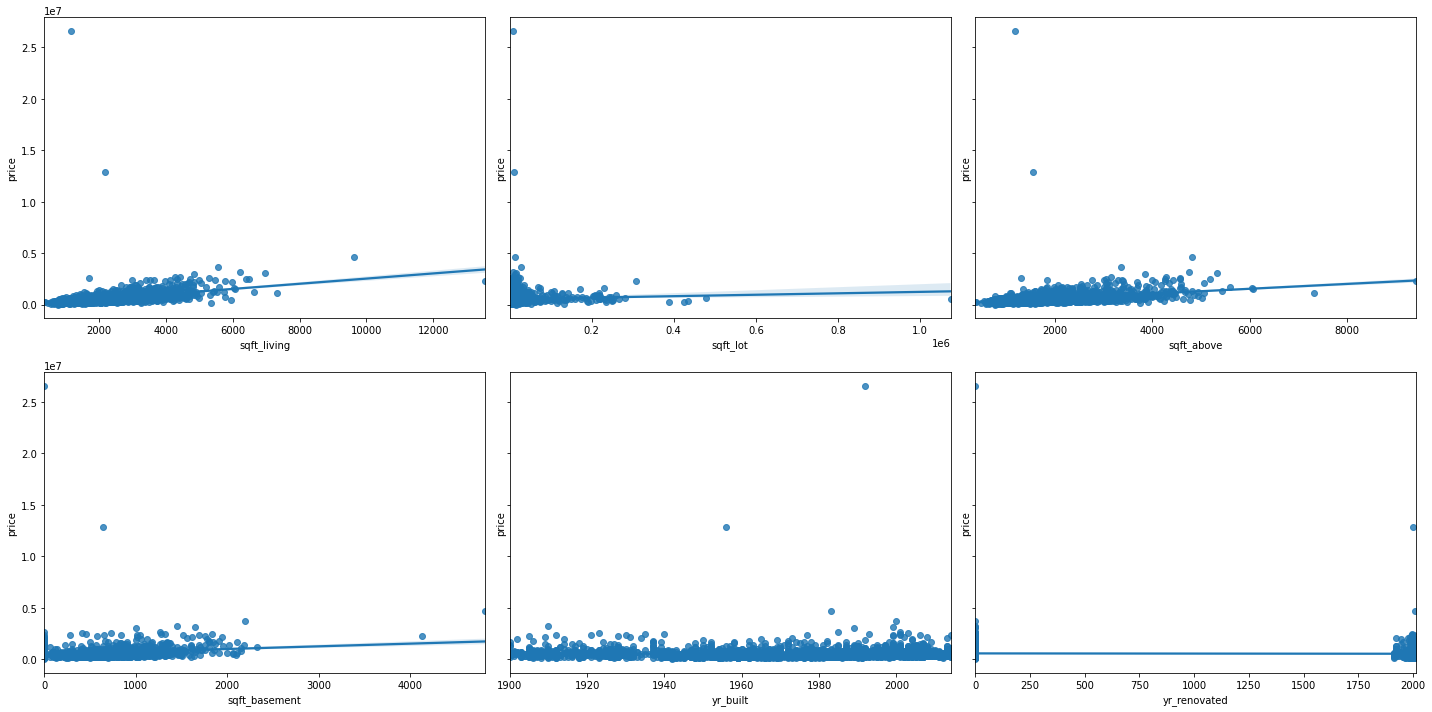

In [28]:
rows = len(continous_features)//3
fig, axs = plt.subplots(rows, 3, sharey=True, tight_layout=True, figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(continous_features):
  sns.regplot(x = var, y = "price", data = data, ax=axs[i])



## **Visualizing dependancy of price on Discrete Features**

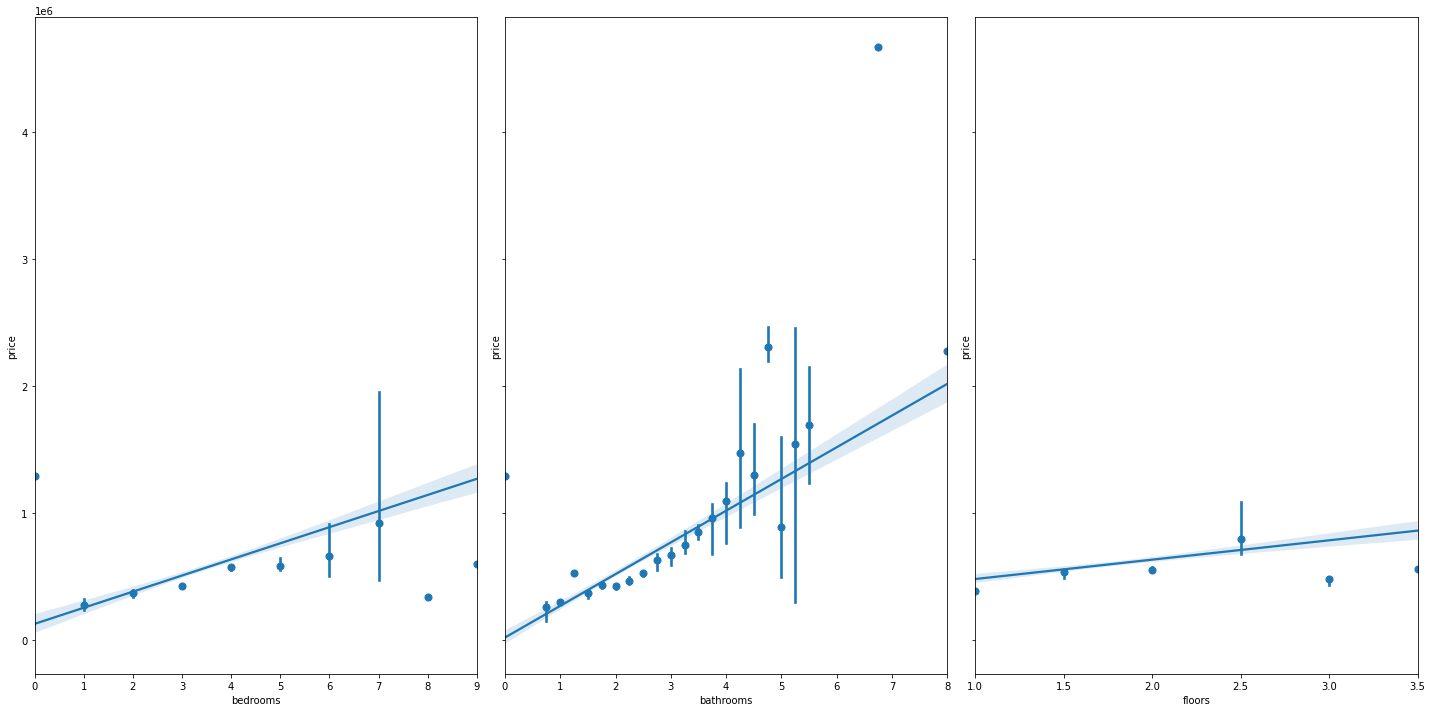

In [29]:
#visualize_dependency(discreate_features,"discrete")

rows = len(discreate_features)//3
fig, axs = plt.subplots(rows, 3, sharey=True, tight_layout=True, figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(discreate_features):
  sns.regplot(x = var, y = "price", data = data, ax=axs[i], x_estimator=np.median)

## **Visualizing dependancy of price on Categorical Features**



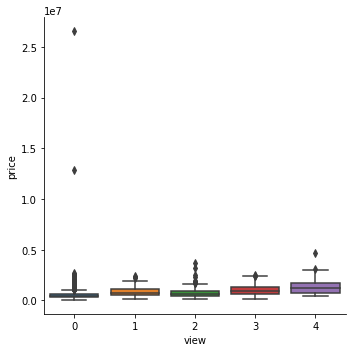

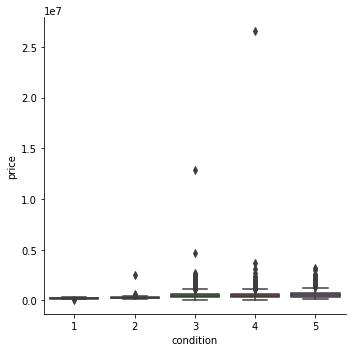

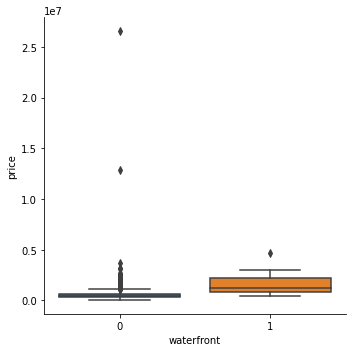

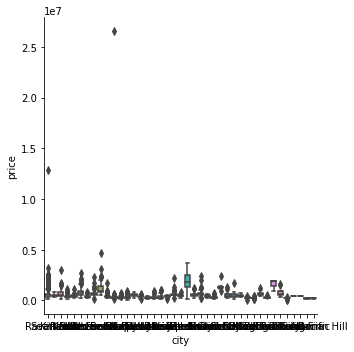

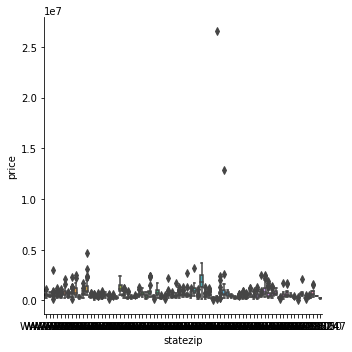

In [30]:
#visualize_dependency(categorical_features,"categorical")
for var in categorical_features:
  sns.catplot(x=var, y = "price", data =data, kind = 'box')

# **5. Encode categorical variables (One hot encoding). Impute missing values (0’s in some columns might be missing values).**

## Creating a new variable called "renovated_after_yr" to determine the gap between year of built and year of rennovation. (for experimentation)

In [ ]:
data_capp['renovated_after_yr'] = data_capp['yr_built']-data_capp['yr_renovated']
data_capp['renovated_after_yr'][data_capp['renovated_after_yr']>=0] = 0
data_capp['renovated_after_yr'] = abs(data_capp['renovated_after_yr'])

In [32]:
data_capp['renovated_after_yr']

0       34
1        0
2        0
3        0
4        0
        ..
2994    40
2995     0
2996     8
2998    27
2999     0
Name: renovated_after_yr, Length: 2567, dtype: int64

## Finding numebr of unique values for each variable

In [33]:
# finding numebr of unique values for each variable
total_unique_values= data.nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Id : 3000
price : 1326
bedrooms : 10
bathrooms : 23
sqft_living : 481
sqft_lot : 2183
floors : 6
waterfront : 2
view : 5
condition : 5
sqft_above : 439
sqft_basement : 187
yr_built : 115
yr_renovated : 58
street : 2970
city : 41
statezip : 75
country : 1


## **Creating feature set(X) and target set(Y)**

**While creating the feature set we drop the unwanted columns like ID, Street and country**

In [82]:
#with removed outliers dataset, data_capp
#X = data_capp.drop(['price','Id','street','country'], axis=1)

# removal of yr_renovated variable
#X = data_capp.drop(['price','Id','street','country','yr_renovated'], axis=1)

# removal of renovated_after_yr variable
X = data_capp.drop(['price','Id','street','country','renovated_after_yr'], axis=1)

# removal of renovated_after_yr & yr_renovated  variable
#X = data_capp.drop(['price','Id','street','country','renovated_after_yr','yr_renovated'], axis=1)

y = data_capp['price']

#with complete dataset
#X = data.drop(['price','Id','street','country'], axis=1)
#y = data['price']

print("shape of independent set:",X.shape)
print("shape of target set:",y.shape)

shape of independent set: (2567, 14)
shape of target set: (2567,)


### **Spliting the datasets**

In [36]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

In [142]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size=0.2,  
    random_state=42)

X_train.shape, X_test.shape

((2053, 14), (514, 14))

## **OneHot encoding categorical variables**

### **Importing modules for feature engineering** 

In [101]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [143]:
#One hot encoding "city" and "statezip" categorical variables
ohe_enc = OneHotCategoricalEncoder(variables = ['city','statezip'], top_categories=None, drop_last=True)
ohe_enc.fit(X_train)

OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                         variables=['city', 'statezip'])

In [144]:
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)
X_train_enc.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_Woodinville,city_Seattle,city_Kenmore,city_Shoreline,city_Redmond,city_Renton,city_Auburn,city_Snoqualmie,city_Burien,city_Kent,city_Bellevue,city_Federal Way,city_Enumclaw,city_Mercer Island,city_Bothell,city_Kirkland,city_Issaquah,city_North Bend,city_Des Moines,city_Maple Valley,city_Covington,city_Tukwila,city_Duvall,city_Carnation,city_Vashon,city_Sammamish,city_Lake Forest Park,city_SeaTac,city_Newcastle,city_Ravensdale,city_Fall City,city_Normandy Park,city_Clyde Hill,city_Black Diamond,city_Pacific,city_Skykomish,city_Algona,city_Preston,statezip_WA 98072,statezip_WA 98108,statezip_WA 98133,statezip_WA 98028,statezip_WA 98106,statezip_WA 98053,statezip_WA 98056,statezip_WA 98001,statezip_WA 98077,statezip_WA 98178,statezip_WA 98103,statezip_WA 98065,statezip_WA 98146,statezip_WA 98042,statezip_WA 98115,statezip_WA 98004,statezip_WA 98155,statezip_WA 98117,statezip_WA 98126,statezip_WA 98023,statezip_WA 98118,statezip_WA 98022,statezip_WA 98119,statezip_WA 98148,statezip_WA 98040,statezip_WA 98092,statezip_WA 98058,statezip_WA 98011,statezip_WA 98144,statezip_WA 98033,statezip_WA 98029,statezip_WA 98003,statezip_WA 98027,statezip_WA 98059,statezip_WA 98136,statezip_WA 98177,statezip_WA 98030,statezip_WA 98006,statezip_WA 98045,statezip_WA 98031,statezip_WA 98105,statezip_WA 98008,statezip_WA 98198,statezip_WA 98034,statezip_WA 98107,statezip_WA 98038,statezip_WA 98166,statezip_WA 98199,statezip_WA 98102,statezip_WA 98122,statezip_WA 98125,statezip_WA 98002,statezip_WA 98032,statezip_WA 98168,statezip_WA 98019,statezip_WA 98052,statezip_WA 98014,statezip_WA 98007,statezip_WA 98070,statezip_WA 98057,statezip_WA 98074,statezip_WA 98112,statezip_WA 98055,statezip_WA 98116,statezip_WA 98051,statezip_WA 98024,statezip_WA 98005,statezip_WA 98075,statezip_WA 98010,statezip_WA 98109,statezip_WA 98188,statezip_WA 98047,statezip_WA 98288,statezip_WA 98050
423,3,2.5,2670,47480,2.0,0,3,3,2670,0,1981,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2371,3,1.5,1640,7222,2.0,0,0,4,1640,0,1908,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1428,3,1.5,1260,1270,2.0,0,0,3,1040,220,2005,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2265,2,1.5,1068,1758,2.0,0,0,3,1068,0,1990,2009,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1579,4,2.5,2000,5962,2.0,0,0,3,2000,0,1999,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **6. Use KNN regression as your model. Try at different  variations of KNN model available in sk-learn (ball_tree, kdd_tree, brute search).**

### **KNeighborsRegressor**

In [145]:
scaler = StandardScaler().fit(X_train_enc)
scaler.transform(X_train_enc)
scaler = StandardScaler().fit(X_test_enc)
scaler.transform(X_test_enc)

array([[-0.33591551,  0.68787844, -0.36521755, ..., -0.04415108,
         0.        ,  0.        ],
       [-0.33591551,  1.07899517, -0.55231046, ..., -0.04415108,
         0.        ,  0.        ],
       [-1.86388517,  0.68787844,  0.29680349, ..., -0.04415108,
         0.        ,  0.        ],
       ...,
       [ 1.19205415,  0.29676172,  0.31119525, ..., -0.04415108,
         0.        ,  0.        ],
       [ 1.19205415,  0.68787844,  1.86550552, ..., -0.04415108,
         0.        ,  0.        ],
       [ 1.19205415, -0.09435501,  0.84369043, ..., -0.04415108,
         0.        ,  0.        ]])

In [146]:
# building a basic KNNRegressor with N=9
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train_enc,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [147]:
from sklearn.model_selection import cross_val_score
neighbors = np.arange(1, 15, 2)
cross_val_scores = []

for i in neighbors:
    knn = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(knn, X_train_enc, y_train, cv=15)
    cross_val_scores.append(np.mean(scores))
    
print(f"best cross-validation score: {np.max(cross_val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
knn.fit(X_train_enc, y_train)
print(f"test-set score: {knn.score(X_test_enc, y_test):.3f}")

best cross-validation score: 0.368
best n_neighbors: 13
test-set score: 0.349


In [148]:
print("Train set score: {:.2f}".format(model.score(X_train_enc, y_train)))
print("Train set score: {:.2f}".format(model.score(X_test_enc, y_test)))

Train set score: 0.48
Train set score: 0.35


### **Ball_Tree**

In [149]:
# building a basic KNNRegressor with N=9
model = KDTree(X_train_enc, leaf_size=30)


# **7, 8. Now create a single pipeline where the last step is KNN regression. Creating a pipeline using GridSearchCV**

In [150]:
# code snippet reference from course work
house_pipeline = Pipeline([

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01, # minimum frequency to be considred frequent
                                    n_categories=4, # min the minimum number of categories a variable should have for the encoder    
                                    variables=['city','statezip'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['city','statezip'], # we can select which variables to encode
                               drop_last=True)),
    ('scaler', StandardScaler()),
    # Logistic Regression
    ('knn', KNeighborsRegressor())
])

In [152]:
# code snippet reference from course work
param_grid = {
    'encoder_rare_label__tol': [0.01,0.1, 0.2],
    'categorical_encoder__top_categories': [None,2,3],
    #scaler
    'scaler': [StandardScaler(), MinMaxScaler(),PolynomialFeatures(), Ridge(), 'passthrough'],
    #'knn__n_neighbors':[4,5,6,7,8,9,10,11]
    'knn__n_neighbors': np.arange(1, 15, 2)

}


In [159]:
grid_search = GridSearchCV(house_pipeline, param_grid,
                           cv=5, iid=False, n_jobs=-1)

In [160]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('encoder_rare_label',
                                        RareLabelCategoricalEncoder(max_n_categories=None,
                                                                    n_categories=4,
                                                                    replace_with='Rare',
                                                                    tol=0.01,
                                                                    variables=['city',
                                                                               'statezip'])),
                                       ('categorical_encoder',
                                        OneHotCategoricalEncoder(drop_last=True,
                                                                 top_categories=None,
                                                                 variables=['city',
                    

In [161]:
grid_search.best_params_

{'categorical_encoder__top_categories': None,
 'encoder_rare_label__tol': 0.01,
 'knn__n_neighbors': 5,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [162]:
print("Validation score: {:.2f}".format(grid_search.score(X_train, y_train)))

Validation score: 0.78


In [163]:
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test score: 0.65


# **9. Changing Parameters and hyperparameters**

There seems to be no significant difference when the random seed is shuffled, but there is change in Validaiton score and Test Score

***cv=13, N=np.arange(8, 15, 2) - For first 3 tuning parameters***
1. **test_size=0.2, random_seed = 15, Validation score: 0.71, Test score: 0.64**

  **Best Parameters**
```
{'categorical_encoder__top_categories': None,
 'encoder_rare_label__tol': 0.01,
 'knn__n_neighbors': 8,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
```


2. **test_size=0.2, random_seed = 42, Validation score: 0.73, Test score: 0.64**

  **Best Parameters**
```
{'categorical_encoder__top_categories': None,
 'encoder_rare_label__tol': 0.01,
 'knn__n_neighbors': 8,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
```

3. **test_size=0.3, random_seed = 0, Validation score: 0.73, Test score: 0.64**

  **Best Parameters**
```
{'categorical_encoder__top_categories': None,
 'encoder_rare_label__tol': 0.01,
 'knn__n_neighbors': 8,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
```
***cv=10, N=np.arange(1, 15, 2)***

4. **test_size=0.2, random_seed = 42, Validation score: 0.78, Test score: 0.65**

  **Best Parameters**
```
{'categorical_encoder__top_categories': None,
 'encoder_rare_label__tol': 0.01,
 'knn__n_neighbors': 5,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
```






# **10. Generating submission**

In [93]:
make_prediction.head()

,Id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3000,2,1.00,1210,9400,1.0,0,0,2,1210,0,1949,0,7542 21st Ave SW,Seattle,WA 98106,USA
1,3001,3,1.75,1620,3975,1.0,0,0,5,940,680,1926,0,6729 Dibble Ave NW,Seattle,WA 98117,USA
2,3002,3,1.00,1520,213444,1.5,0,3,5,1520,0,1988,0,10500 185th Ave SE,Renton,WA 98059,USA
3,3003,4,2.50,2910,5776,2.0,0,2,3,2910,0,1998,2006,6907 Fairway Ave SE,Snoqualmie,WA 98065,USA
4,3004,4,2.50,2683,40386,2.0,0,0,4,2683,0,1987,0,10821 151st Ave NE,Redmond,WA 98052,USA


In [164]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip'],
      dtype='object')

In [165]:
make_prediction.columns

Index(['Id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [166]:
X_make_prediction = make_prediction.drop(['Id','street','country'], axis=1)

In [167]:
X_make_prediction.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip'],
      dtype='object')

In [168]:
make_prediction_labels = grid_search.predict(X_make_prediction)
make_prediction_labels.shape

(1552,)

In [171]:
pd.DataFrame({'Id': make_prediction.Id, 'price': make_prediction_labels}).to_csv('RXD190017_solutions.csv', index =False)  